# ENDTERM PROJECT - Game Recommendations on Steam EDA <hr style="border:5px solid #126782"></hr>


**Name:** Gabriel Blaise Pusta <br>
**Course:** BSCPE2A

## **I - CLEANING**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Loading Dataset

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\MATHEDA Pusta\ENDTERMACTIVITY\raw\steam-trends2023.csv", 
                 delimiter = ",")
df.head(8)


,App ID,Title,Reviews Total,Reviews Score Fancy,Release Date,Reviews D7,Reviews D30,Reviews D90,Launch Price,Tags,name_slug,Revenue Estimated,Modified Tags,Steam Page
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,NaN,NaN,NaN,"$14,99","FPS, Shooter, Multiplayer, Competitive, Action...",NaN,"$110 666 598,05","FPS_, Shooter_, Multiplayer_, Competitive_, Ac...",https://store.steampowered.com/app/730
1,578080,PUBG: BATTLEGROUNDS,2201296,57%,2017-12-21,NaN,NaN,NaN,"$29,99","Survival, Shooter, Battle Royale, Multiplayer,...",NaN,"$66 016 867,04","Survival_, Shooter_, Battle Royale_, Multiplay...",https://store.steampowered.com/app/578080
2,570,Dota 2,2017009,82%,2013-07-09,NaN,NaN,NaN,"$29,99","Free to Play, MOBA, Multiplayer, Strategy, eSp...",NaN,"$60 490 099,91","Free to Play_, MOBA_, Multiplayer_, Strategy_,...",https://store.steampowered.com/app/570
3,271590,Grand Theft Auto V,1322782,"89,85%",2015-04-13,NaN,NaN,NaN,"$29,99","Open World, Action, Multiplayer, Crime, Automo...",NaN,"$39 670 232,18","Open World_, Action_, Multiplayer_, Crime_, Au...",https://store.steampowered.com/app/271590
4,359550,Tom Clancy's Rainbow Six® Siege,978762,86%,2015-12-01,NaN,NaN,NaN,"$59,99","FPS, PvP, eSports, Shooter, Multiplayer, Tacti...",NaN,"$58 715 932,38","FPS_, PvP_, eSports_, Shooter_, Multiplayer_, ...",https://store.steampowered.com/app/359550
5,105600,Terraria,927752,97%,2011-05-16,NaN,NaN,NaN,"$9,99","Open World Survival Craft, Sandbox, Survival, ...",NaN,"$9 268 242,48","Open World Survival Craft_, Sandbox_, Survival...",https://store.steampowered.com/app/105600
6,4000,Garry's Mod,841853,96%,2006-11-29,NaN,NaN,NaN,"$9,99","Sandbox, Multiplayer, Funny, Moddable, Buildin...",NaN,"$8 410 111,47","Sandbox_, Multiplayer_, Funny_, Moddable_, Bui...",https://store.steampowered.com/app/4000
7,252490,Rust,775223,87%,2018-02-08,NaN,NaN,NaN,"$39,99","Survival, Crafting, Multiplayer, Open World, O...",NaN,"$31 001 167,77","Survival_, Crafting_, Multiplayer_, Open World...",https://store.steampowered.com/app/252490


### Cleaning the Dataset

In [4]:
print(df.isna().sum()) #Check for NAN values


App ID                     0
Title                      0
Reviews Total              0
Reviews Score Fancy        0
Release Date               0
Reviews D7             65111
Reviews D30            65111
Reviews D90            65111
Launch Price               0
Tags                       0
name_slug              65111
Revenue Estimated          0
Modified Tags              0
Steam Page                 0
dtype: int64


In [5]:

df = df[['App ID', 'Title', 'Reviews Total', 'Reviews Score Fancy',
         'Release Date', 'Launch Price', 'Tags', 'Revenue Estimated', 'Modified Tags']]

# converts to time format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

df['Launch Price'] = df['Launch Price'].str.replace(r'[^\d,]', '', regex=True) #removes $
df['Launch Price'] = df['Launch Price'].astype(str).str.replace(',', '.', regex=False) #replaces , to .
df['Launch Price'] = df['Launch Price'].astype(float)

df['Revenue Estimated'] = df['Revenue Estimated'].str.replace(r'[^\d,]', '', regex=True) #removes $
df['Revenue Estimated'] = df['Revenue Estimated'].astype(str).str.replace(',', '.', regex=False) #replaces , to .
df['Revenue Estimated'] = df['Revenue Estimated'].astype(float)

df['Reviews Total'] = pd.to_numeric(df['Reviews Total'], errors='coerce')




In [6]:
df.to_csv(r"C:\Users\User\Desktop\MATHEDA Pusta\ENDTERMACTIVITY\raw\steam-trends2023-cleaned.csv",index=False)


In [7]:
df.head(10)

,App ID,Title,Reviews Total,Reviews Score Fancy,Release Date,Launch Price,Tags,Revenue Estimated,Modified Tags
0,730,Counter-Strike: Global Offensive,7382695,88%,2012-08-21,14.99,"FPS, Shooter, Multiplayer, Competitive, Action...",1.106666e+08,"FPS_, Shooter_, Multiplayer_, Competitive_, Ac..."
1,578080,PUBG: BATTLEGROUNDS,2201296,57%,2017-12-21,29.99,"Survival, Shooter, Battle Royale, Multiplayer,...",6.601687e+07,"Survival_, Shooter_, Battle Royale_, Multiplay..."
2,570,Dota 2,2017009,82%,2013-07-09,29.99,"Free to Play, MOBA, Multiplayer, Strategy, eSp...",6.049010e+07,"Free to Play_, MOBA_, Multiplayer_, Strategy_,..."
3,271590,Grand Theft Auto V,1322782,"89,85%",2015-04-13,29.99,"Open World, Action, Multiplayer, Crime, Automo...",3.967023e+07,"Open World_, Action_, Multiplayer_, Crime_, Au..."
4,359550,Tom Clancy's Rainbow Six® Siege,978762,86%,2015-12-01,59.99,"FPS, PvP, eSports, Shooter, Multiplayer, Tacti...",5.871593e+07,"FPS_, PvP_, eSports_, Shooter_, Multiplayer_, ..."
5,105600,Terraria,927752,97%,2011-05-16,9.99,"Open World Survival Craft, Sandbox, Survival, ...",9.268242e+06,"Open World Survival Craft_, Sandbox_, Survival..."
6,4000,Garry's Mod,841853,96%,2006-11-29,9.99,"Sandbox, Multiplayer, Funny, Moddable, Buildin...",8.410111e+06,"Sandbox_, Multiplayer_, Funny_, Moddable_, Bui..."
7,252490,Rust,775223,87%,2018-02-08,39.99,"Survival, Crafting, Multiplayer, Open World, O...",3.100117e+07,"Survival_, Crafting_, Multiplayer_, Open World..."
8,292030,The Witcher® 3: Wild Hunt,662523,96%,2015-05-18,39.99,"Open World, RPG, Story Rich, Atmospheric, Matu...",2.649429e+07,"Open World_, RPG_, Story Rich_, Atmospheric_, ..."
9,945360,Among Us,585788,92%,2018-11-16,4.99,"Multiplayer, Online Co Op, Social Deduction, S...",2.923082e+06,"Multiplayer_, Online Co Op_, Social Deduction_..."


In [8]:
df_top_games = df.nlargest(10, 'Reviews Total')
table = df_top_games[['Title', 'Reviews Total']]
print(table)

                              Title  Reviews Total
0  Counter-Strike: Global Offensive        7382695
1               PUBG: BATTLEGROUNDS        2201296
2                            Dota 2        2017009
3                Grand Theft Auto V        1322782
4   Tom Clancy's Rainbow Six® Siege         978762
5                          Terraria         927752
6                       Garry's Mod         841853
7                              Rust         775223
8         The Witcher® 3: Wild Hunt         662523
9                          Among Us         585788


C:\Users\User\AppData\Local\Temp\ipykernel_7552\2148805382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_games['Title'], x=top_games['Reviews Total'], palette="Blues_r")


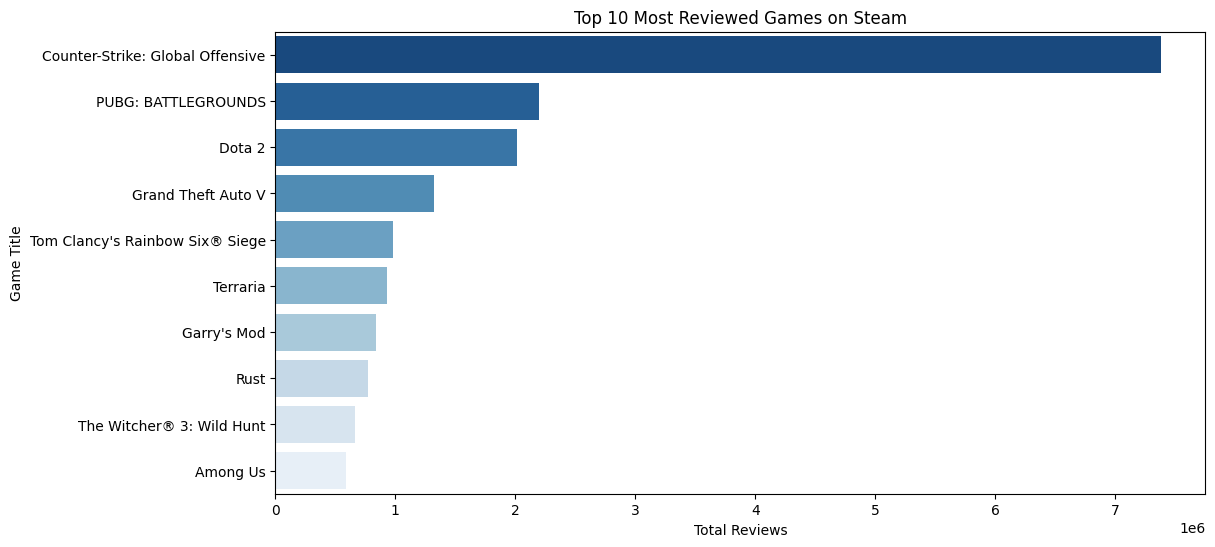

In [9]:
top_games = df.nlargest(10, 'Reviews Total')  

plt.figure(figsize=(12, 6))
sns.barplot(y=top_games['Title'], x=top_games['Reviews Total'], palette="Blues_r")
plt.xlabel("Total Reviews")
plt.ylabel("Game Title")
plt.title("Top 10 Most Reviewed Games on Steam")
plt.show()

In [10]:
df_top_revenue = df.nlargest(10, 'Revenue Estimated')
table = df_top_revenue[['Title', 'Revenue Estimated', 'Reviews Total']]
print(table)

                               Title  Revenue Estimated  Reviews Total
0   Counter-Strike: Global Offensive       1.106666e+08        7382695
1                PUBG: BATTLEGROUNDS       6.601687e+07        2201296
2                             Dota 2       6.049010e+07        2017009
4    Tom Clancy's Rainbow Six® Siege       5.871593e+07         978762
3                 Grand Theft Auto V       3.967023e+07        1322782
12                    Cyberpunk 2077       3.293475e+07         549004
13                        ELDEN RING       3.119624e+07         520024
7                               Rust       3.100117e+07         775223
8          The Witcher® 3: Wild Hunt       2.649429e+07         662523
21             Red Dead Redemption 2       2.369227e+07         394937


C:\Users\User\AppData\Local\Temp\ipykernel_7552\4088174844.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top_revenue['Title'], rotation=45, ha="right")


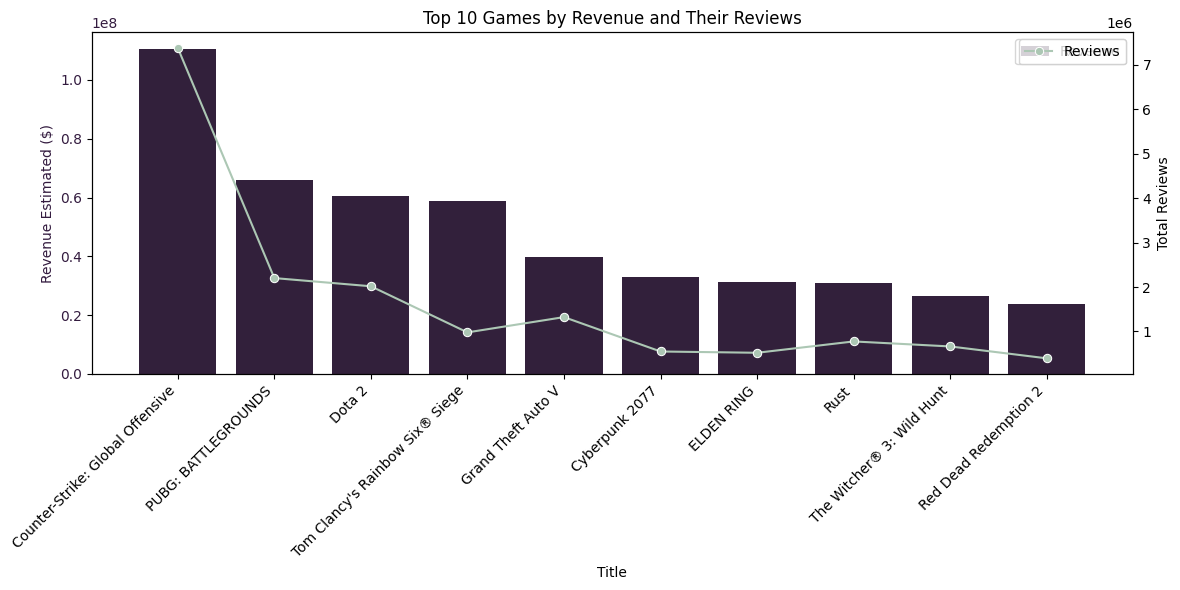

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='Title', y='Revenue Estimated', data=df_top_revenue, ax=ax1, color='#331B3F', label='Revenue')
ax1.set_ylabel("Revenue Estimated ($)", color='#331B3F')
ax1.tick_params(axis='y', labelcolor='#331B3F')
ax1.set_xticklabels(df_top_revenue['Title'], rotation=45, ha="right")

ax2 = ax1.twinx()
sns.lineplot(x='Title', y='Reviews Total', data=df_top_revenue, ax=ax2, color='#ACC7B4', marker="o", label='Reviews')
ax2.set_ylabel("Total Reviews", color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Top 10 Games by Revenue and Their Reviews")
fig.tight_layout()
plt.show()

In [12]:
df['Release Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
yearly_counts = df['Release Year'].value_counts().sort_index()
print(yearly_counts)

Release Year
1970       74
1983        2
1984        3
1985        4
1986        6
1987        6
1988       15
1989       15
1990       22
1991       15
1992       21
1993       30
1994       40
1995       36
1996       43
1997       50
1998       57
1999       53
2000       50
2001       61
2002       51
2003       85
2004       74
2005       95
2006      141
2007      154
2008      190
2009      265
2010      296
2011      339
2012      403
2013      518
2014     1228
2015     2239
2016     3767
2017     5413
2018     7051
2019     6771
2020     8236
2021     9743
2022    10641
2023     6806
2024        2
Name: count, dtype: int64


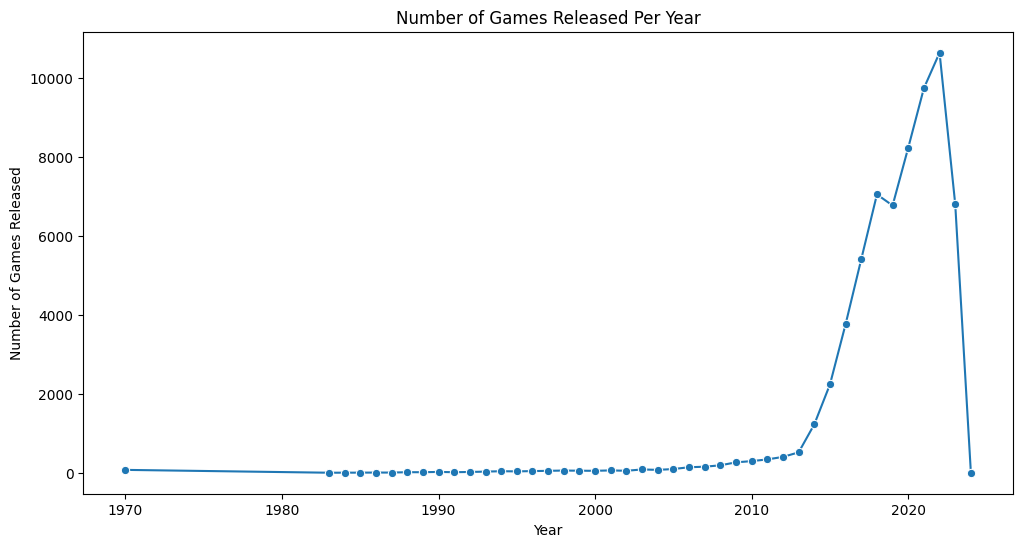

In [13]:
df['Release Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
yearly_counts = df['Release Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title("Number of Games Released Per Year")
plt.show()

In [14]:
all_tags = ','.join(df['Modified Tags'].dropna()).replace('_', '').split(',')


tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False).head(10)


print(tag_df)

               Tag  Count
42    Singleplayer  36472
60           Indie  34138
84          Casual  21515
41       Adventure  21023
54              2D  19787
4           Action  17828
147         Puzzle  11910
26      Simulation  11507
44     Atmospheric  11373
234         Action  11303


C:\Users\User\AppData\Local\Temp\ipykernel_7552\4264232806.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=tag_df['Tag'], x=tag_df['Count'], palette="viridis")


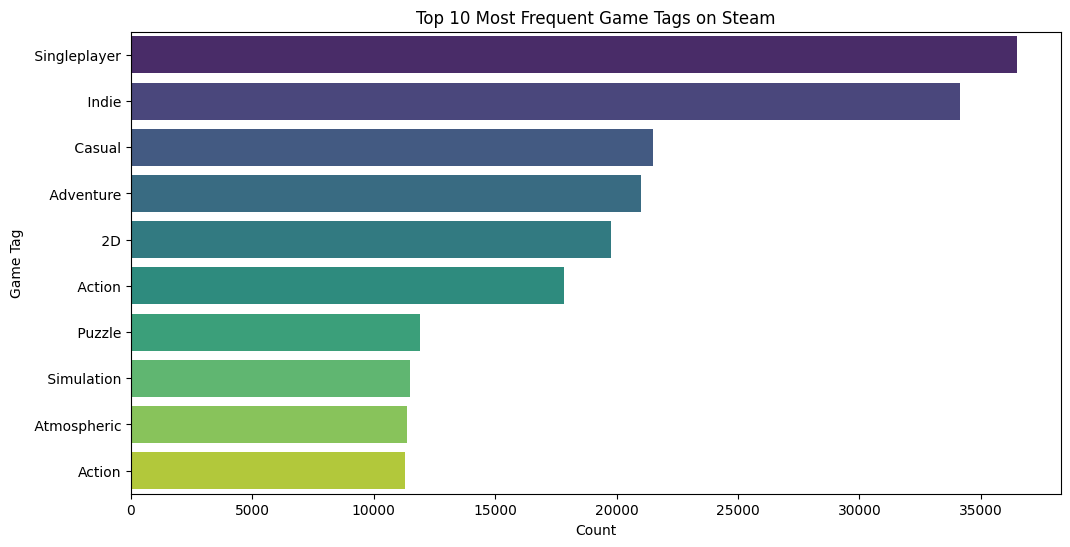

In [15]:
from collections import Counter


all_tags = ','.join(df['Modified Tags'].dropna()).replace('_', '').split(',')


tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(y=tag_df['Tag'], x=tag_df['Count'], palette="viridis")
plt.xlabel("Count")
plt.ylabel("Game Tag")
plt.title("Top 10 Most Frequent Game Tags on Steam")
plt.show()

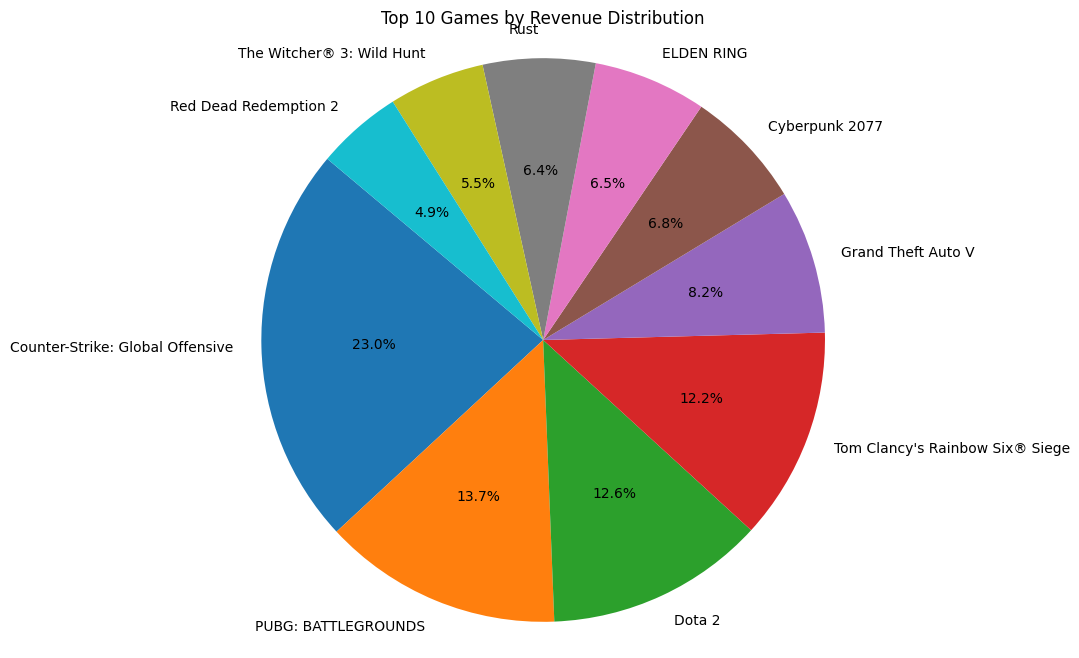

In [16]:
top_revenue_games = df.nlargest(10, 'Revenue Estimated')

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_revenue_games['Revenue Estimated'], labels=top_revenue_games['Title'], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Games by Revenue Distribution")
plt.axis('equal') 
plt.show()

In [17]:

revenue_singleplayer_games = df[df['Modified Tags'].str.contains('Singleplayer', na=False, case=False)]
top_10revenue_singleplayer = revenue_singleplayer_games.nlargest(10, 'Revenue Estimated')
print(top_10revenue_singleplayer[['Title', 'Revenue Estimated']])

                                Title  Revenue Estimated
3                  Grand Theft Auto V        39670232.18
12                     Cyberpunk 2077        32934749.96
13                         ELDEN RING        31196239.76
8           The Witcher® 3: Wild Hunt        26494294.77
21              Red Dead Redemption 2        23692270.63
34  Call of Duty®: Modern Warfare® II        16173289.20
15              ARK: Survival Evolved        14698069.01
36                    DARK SOULS™ III        13713534.03
41                       No Man's Sky        12398493.24
43                          Fallout 4        12106581.90


In [18]:

reviews_singleplayer_games = df[df['Modified Tags'].str.contains('Singleplayer', na=False, case=False)]
top_10reviews_singleplayer = reviews_singleplayer_games.nlargest(10, 'Reviews Total')
print(top_10reviews_singleplayer[['Title', 'Reviews Total']])

                        Title  Reviews Total
3          Grand Theft Auto V        1322782
5                    Terraria         927752
6                 Garry's Mod         841853
8   The Witcher® 3: Wild Hunt         662523
10              Left 4 Dead 2         564441
12             Cyberpunk 2077         549004
13                 ELDEN RING         520024
14             Stardew Valley         495433
15      ARK: Survival Evolved         490099
19                 The Forest         413144


C:\Users\User\AppData\Local\Temp\ipykernel_7552\4227816897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10revenue_singleplayer['Title'], x=top_10revenue_singleplayer['Revenue Estimated'], palette="magma")


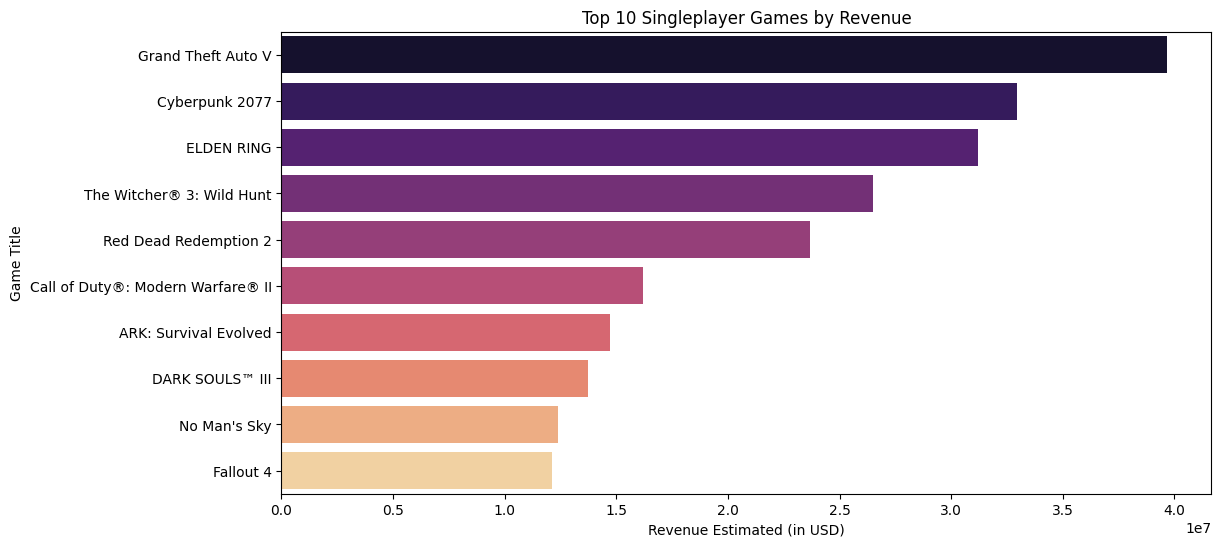

In [19]:

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10revenue_singleplayer['Title'], x=top_10revenue_singleplayer['Revenue Estimated'], palette="magma")
plt.xlabel("Revenue Estimated (in USD)")
plt.ylabel("Game Title")
plt.title("Top 10 Singleplayer Games by Revenue")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7552\1975622943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10reviews_singleplayer['Title'], x=top_10reviews_singleplayer['Reviews Total'], palette="YlGnBu")


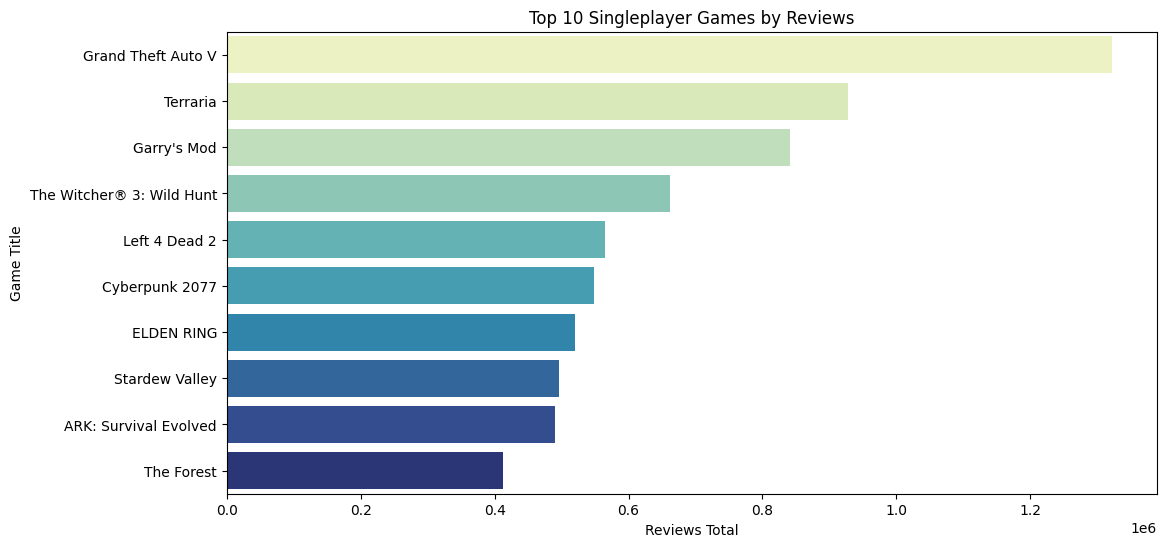

In [20]:

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10reviews_singleplayer['Title'], x=top_10reviews_singleplayer['Reviews Total'], palette="YlGnBu")
plt.xlabel("Reviews Total")
plt.ylabel("Game Title")
plt.title("Top 10 Singleplayer Games by Reviews")
plt.show()

In [21]:
combined_singleplayer = pd.concat([top_10revenue_singleplayer, top_10reviews_singleplayer]).drop_duplicates(subset=['Title'])
print(combined_singleplayer[['Title', 'Reviews Total', 'Revenue Estimated']])

                                Title  Reviews Total  Revenue Estimated
3                  Grand Theft Auto V        1322782        39670232.18
12                     Cyberpunk 2077         549004        32934749.96
13                         ELDEN RING         520024        31196239.76
8           The Witcher® 3: Wild Hunt         662523        26494294.77
21              Red Dead Redemption 2         394937        23692270.63
34  Call of Duty®: Modern Warfare® II         231080        16173289.20
15              ARK: Survival Evolved         490099        14698069.01
36                    DARK SOULS™ III         228597        13713534.03
41                       No Man's Sky         206676        12398493.24
43                          Fallout 4         201810        12106581.90
5                            Terraria         927752         9268242.48
6                         Garry's Mod         841853         8410111.47
10                      Left 4 Dead 2         564441         563

C:\Users\User\AppData\Local\Temp\ipykernel_7552\1164913511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


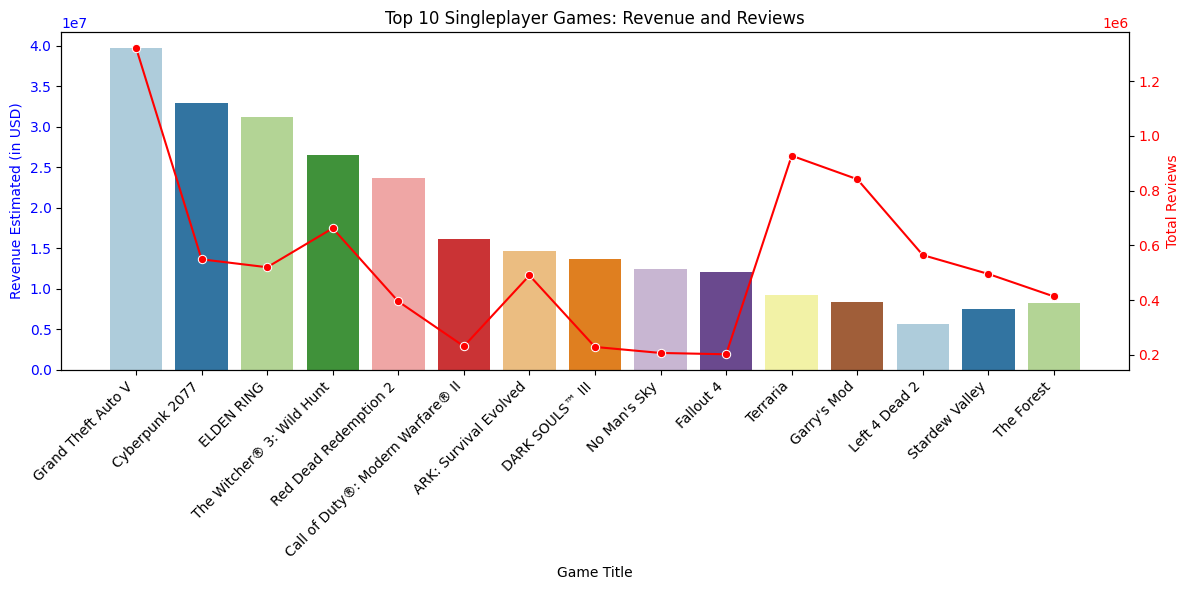

In [22]:

fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(
    x='Title', 
    y='Revenue Estimated', 
    data=combined_singleplayer, 
    palette="Paired", 
    ax=ax1
)
ax1.set_xlabel("Game Title")
ax1.set_ylabel("Revenue Estimated (in USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha="right")


ax2 = ax1.twinx()
sns.lineplot(
    x='Title', 
    y='Reviews Total', 
    data=combined_singleplayer, 
    ax=ax2, 
    color='red', 
    marker="o", 
    sort=False  
)
ax2.set_ylabel("Total Reviews", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Top 10 Singleplayer Games: Revenue and Reviews")
fig.tight_layout()
plt.show()

In [23]:
revenue_indie_games = df[df['Modified Tags'].str.contains('indie', na=False, case=False)]
top_10revenue_indie = revenue_indie_games.nlargest(10, 'Revenue Estimated')
print(top_10revenue_indie[['Title', 'Revenue Estimated']])

                           Title  Revenue Estimated
7                           Rust        31001167.77
15         ARK: Survival Evolved        14698069.01
25                          DayZ        13215137.65
41                  No Man's Sky        12398493.24
17        Euro Truck Simulator 2         9664045.56
5                       Terraria         9268242.48
6                    Garry's Mod         8410111.47
19                    The Forest         8258748.56
22  Fall Guys: Ultimate Knockout         7787924.09
14                Stardew Valley         7426540.67


In [24]:
review_indie_games = df[df['Modified Tags'].str.contains('indie', na=False, case=False)]
top_10review_indie = review_indie_games.nlargest(10, 'Reviews Total')
print(top_10review_indie[['Title', 'Reviews Total']])

                           Title  Reviews Total
5                       Terraria         927752
6                    Garry's Mod         841853
7                           Rust         775223
14                Stardew Valley         495433
15         ARK: Survival Evolved         490099
17        Euro Truck Simulator 2         483444
18                  Phasmophobia         466827
19                    The Forest         413144
22  Fall Guys: Ultimate Knockout         389591
23                       Valheim         353477


C:\Users\User\AppData\Local\Temp\ipykernel_7552\2947472704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10revenue_indie['Title'], x=top_10revenue_indie['Revenue Estimated'], palette="magma")


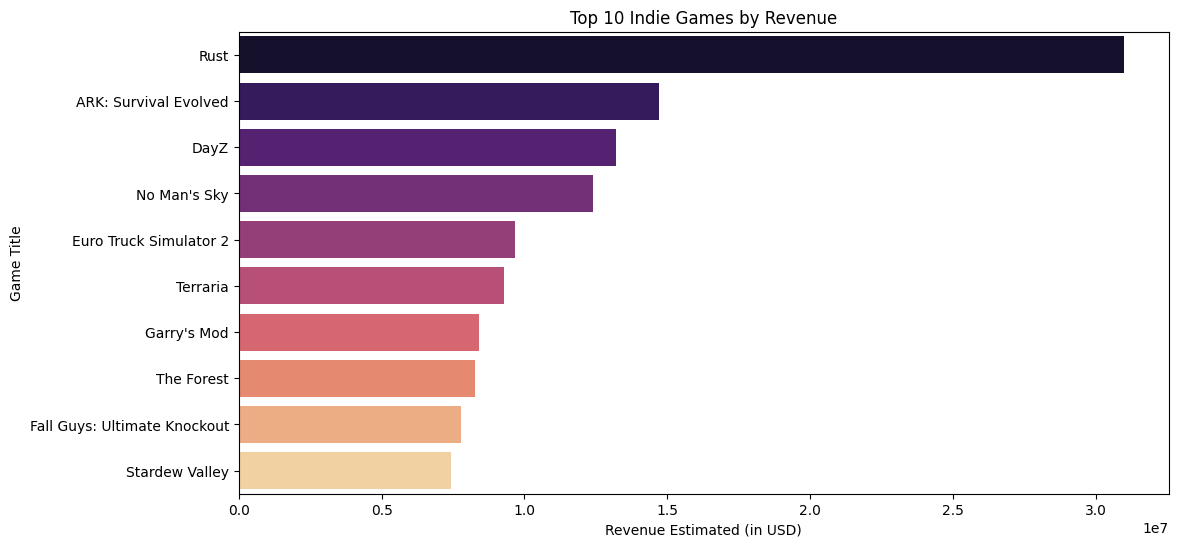

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10revenue_indie['Title'], x=top_10revenue_indie['Revenue Estimated'], palette="magma")
plt.xlabel("Revenue Estimated (in USD)")
plt.ylabel("Game Title")
plt.title("Top 10 Indie Games by Revenue")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7552\4121491855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10review_indie['Title'], x=top_10review_indie['Reviews Total'], palette="YlGnBu")


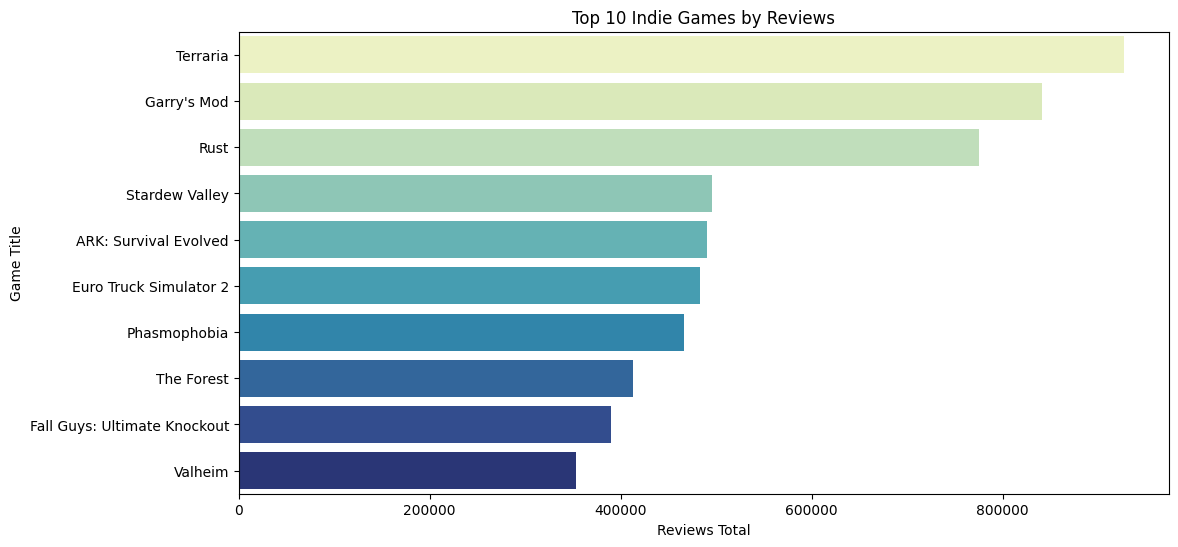

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10review_indie['Title'], x=top_10review_indie['Reviews Total'], palette="YlGnBu")
plt.xlabel("Reviews Total")
plt.ylabel("Game Title")
plt.title("Top 10 Indie Games by Reviews")
plt.show()

In [27]:
combined_indie = pd.concat([top_10revenue_indie, top_10review_indie]).drop_duplicates(subset=['Title'])
print(combined_indie[['Title', 'Reviews Total', 'Revenue Estimated']])

                           Title  Reviews Total  Revenue Estimated
7                           Rust         775223        31001167.77
15         ARK: Survival Evolved         490099        14698069.01
25                          DayZ         293735        13215137.65
41                  No Man's Sky         206676        12398493.24
17        Euro Truck Simulator 2         483444         9664045.56
5                       Terraria         927752         9268242.48
6                    Garry's Mod         841853         8410111.47
19                    The Forest         413144         8258748.56
22  Fall Guys: Ultimate Knockout         389591         7787924.09
14                Stardew Valley         495433         7426540.67
18                  Phasmophobia         466827         6530909.73
23                       Valheim         353477         7066005.23


C:\Users\User\AppData\Local\Temp\ipykernel_7552\2330951023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


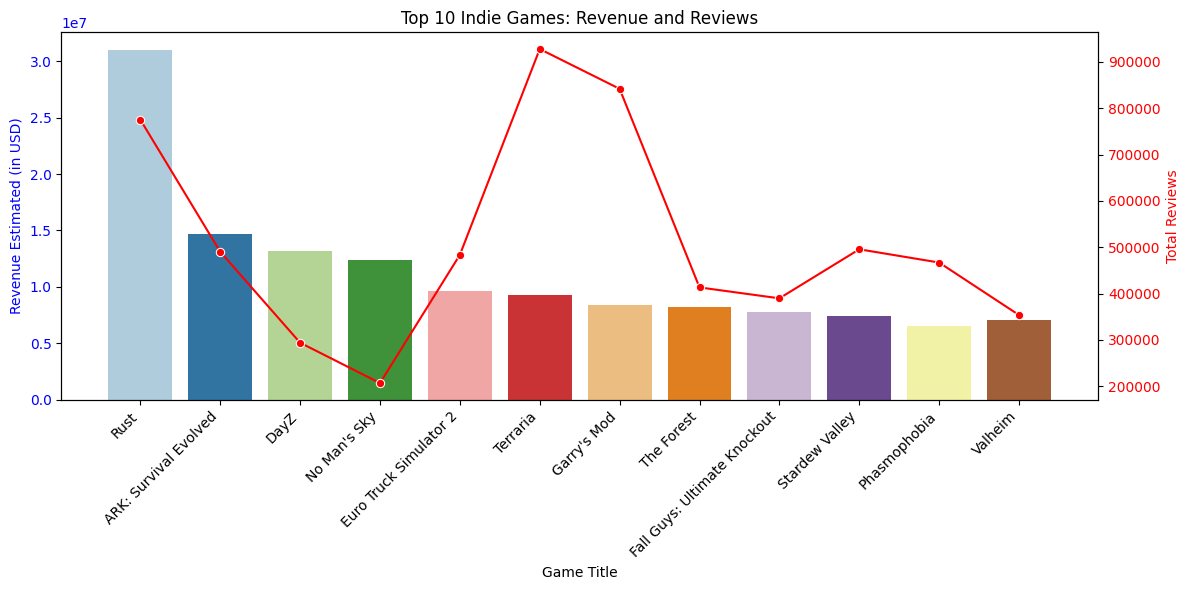

In [28]:

fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(
    x='Title', 
    y='Revenue Estimated', 
    data=combined_indie, 
    palette="Paired", 
    ax=ax1
)
ax1.set_xlabel("Game Title")
ax1.set_ylabel("Revenue Estimated (in USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha="right")


ax2 = ax1.twinx()
sns.lineplot(
    x='Title', 
    y='Reviews Total', 
    data=combined_indie, 
    ax=ax2, 
    color='red', 
    marker="o",
    sort=False  
)
ax2.set_ylabel("Total Reviews", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Top 10 Indie Games: Revenue and Reviews")
fig.tight_layout()
plt.show()

In [29]:
casual_games = df[df['Modified Tags'].str.contains('casual', na=False, case=False)]

top_10revenue_casual = casual_games.nlargest(10, 'Revenue Estimated')
print("\nTop 10 Casual Games by Revenue:\n", top_10revenue_casual[['Title', 'Revenue Estimated']])


Top 10 Casual Games by Revenue:
                             Title  Revenue Estimated
17         Euro Truck Simulator 2         9664045.56
65              Battlefield™ 2042         8994360.69
22   Fall Guys: Ultimate Knockout         7787924.09
14                 Stardew Valley         7426540.67
24                 Rocket League®         6740108.26
54               Cities: Skylines         5284807.81
104                   The Sims™ 4         4254816.03
212            EA SPORTS™ FIFA 21         3410611.47
32                    Bloons TD 6         3275170.92
61    Life is Strange - Episode 1         3223927.23


In [30]:
top_10review_casual = casual_games.nlargest(10, 'Reviews Total')
print("\nTop 10 Casual Games by Reviews:\n", top_10review_casual[['Title', 'Reviews Total']])


Top 10 Casual Games by Reviews:
                            Title  Reviews Total
9                       Among Us         585788
14                Stardew Valley         495433
17        Euro Truck Simulator 2         483444
22  Fall Guys: Ultimate Knockout         389591
24                Rocket League®         337174
32                   Bloons TD 6         234108
35                 Geometry Dash         229406
45             Vampire Survivors         191904
47             People Playground         187426
54              Cities: Skylines         176219


C:\Users\User\AppData\Local\Temp\ipykernel_7552\3498893056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


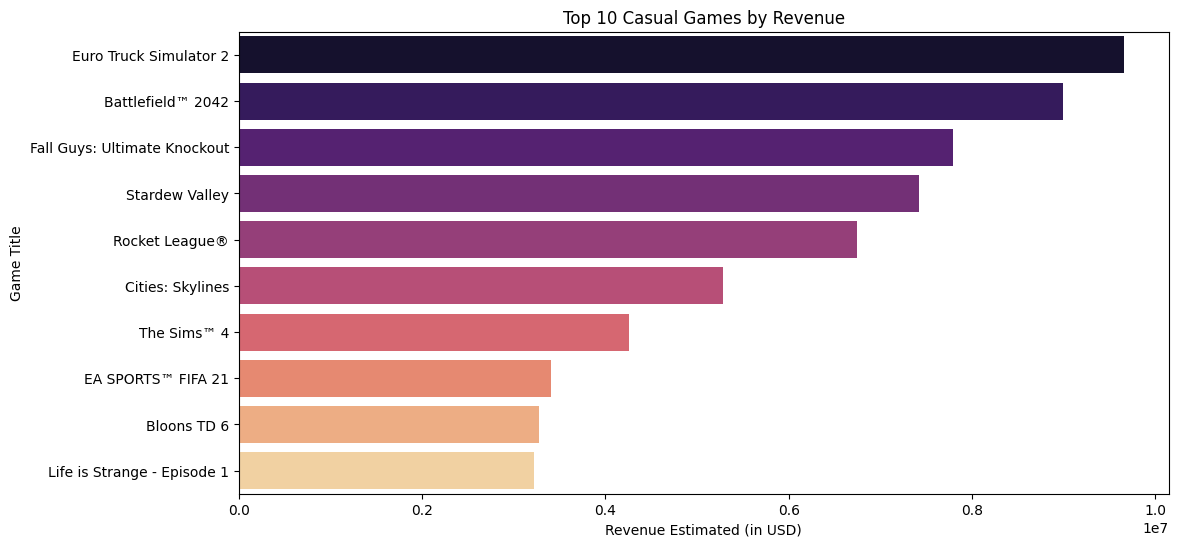

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_10revenue_casual['Title'], 
    x=top_10revenue_casual['Revenue Estimated'], 
    palette="magma"
)
plt.xlabel("Revenue Estimated (in USD)")
plt.ylabel("Game Title")
plt.title("Top 10 Casual Games by Revenue")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7552\4015835050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


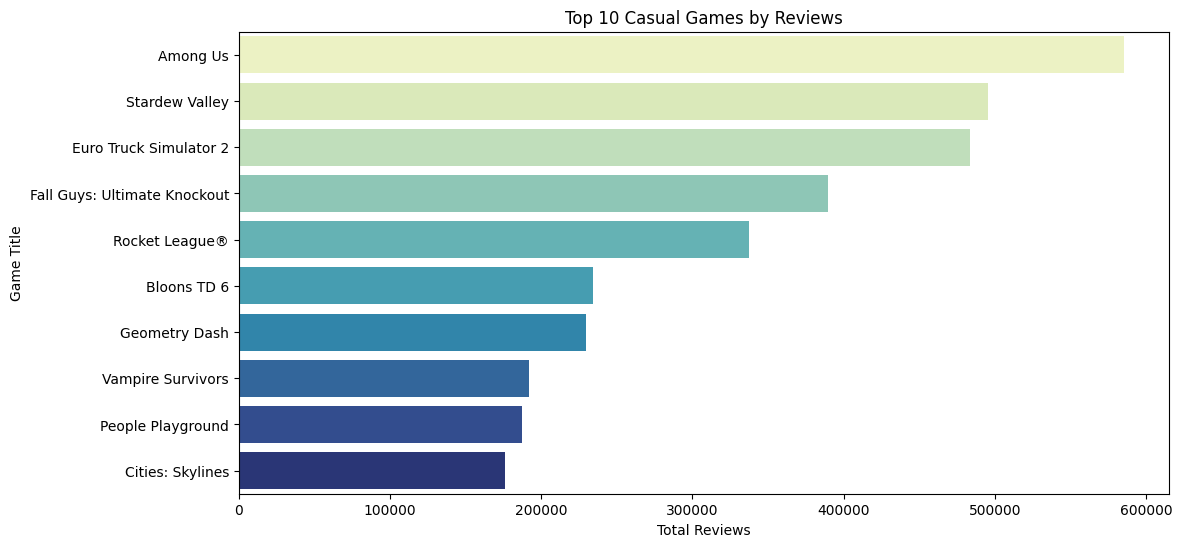

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_10review_casual['Title'], 
    x=top_10review_casual['Reviews Total'], 
    palette="YlGnBu"
)
plt.xlabel("Total Reviews")
plt.ylabel("Game Title")
plt.title("Top 10 Casual Games by Reviews")
plt.show()

In [33]:
combined_casual = pd.concat([top_10revenue_casual, top_10review_casual]).drop_duplicates(subset=['Title'])
print(combined_casual[['Title', 'Reviews Total', 'Revenue Estimated']])


                            Title  Reviews Total  Revenue Estimated
17         Euro Truck Simulator 2         483444         9664045.56
65              Battlefield™ 2042         149931         8994360.69
22   Fall Guys: Ultimate Knockout         389591         7787924.09
14                 Stardew Valley         495433         7426540.67
24                 Rocket League®         337174         6740108.26
54               Cities: Skylines         176219         5284807.81
104                   The Sims™ 4         106397         4254816.03
212            EA SPORTS™ FIFA 21          56853         3410611.47
32                    Bloons TD 6         234108         3275170.92
61    Life is Strange - Episode 1         161277         3223927.23
9                        Among Us         585788         2923082.12
35                  Geometry Dash         229406          915329.94
45              Vampire Survivors         191904          957600.96
47              People Playground         187426

C:\Users\User\AppData\Local\Temp\ipykernel_7552\1542876037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


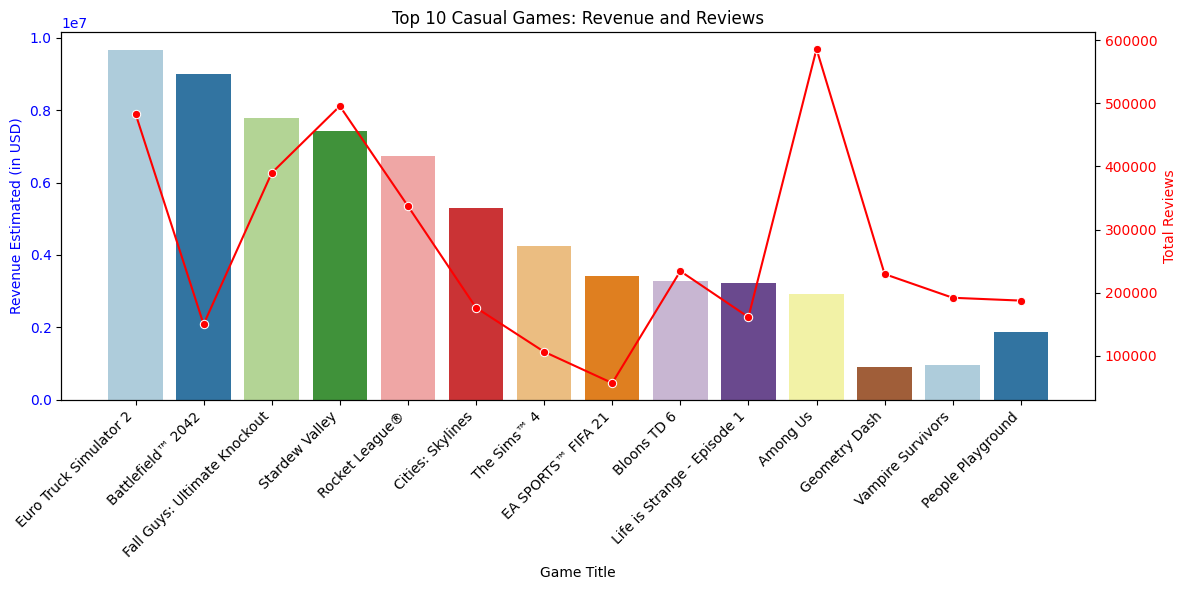

In [34]:
fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(
    x='Title', 
    y='Revenue Estimated', 
    data=combined_casual, 
    palette="Paired", 
    ax=ax1
)
ax1.set_xlabel("Game Title")
ax1.set_ylabel("Revenue Estimated (in USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha="right")


ax2 = ax1.twinx()
sns.lineplot(
    x='Title', 
    y='Reviews Total', 
    data=combined_casual, 
    ax=ax2, 
    color='red', 
    marker="o",
    sort=False)  
    
ax2.set_ylabel("Total Reviews", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Top 10 Casual Games: Revenue and Reviews")
fig.tight_layout()
plt.show()